# Pands Project_Iris Data Set Analysis 

-----------------

**Author**: Alec Reid

**Student Number**: G00411003

**Date Commenced**: 03/01/2025

---------------

### Table of Contents

**1. Introduction**

- Project Overview
- Objectives

**2. Data Exploration**

- Imports
- Loading the Dataset
- Data Structure and Summary Statistics
- Class Distribution
- Summary of dataset into a txt file

**3. Data Visualisation**
- Histograms 
- Pairplots (Scatter Plots)
- Correlation Heatmap

**4. Addtional Analysis**
- Hungry Bee & Lite Bite Bee
- Fuzzy Bee 
- Dreamer Bee 

**5. Conclusion and Future Work**
- Summary of Findings
- Future Work

**6. References**
- Bibliography

--------

# (1.) Introduction
### (1.1) Project Overview 

This project focuses on analyzing the Iris dataset, a well-known dataset in the field of machine learning and data science. The Iris dataset contains measurements of various physical features of three species of Iris flowers: Iris-setosa, Iris-versicolor, and Iris-virginica. The goal of this analysis is to gain insights into the relationships between the features of the flowers and how these measurements can help distinguish between the different species.

Through this analysis, we aim to explore the dataset's statistical characteristics, visualize the relationships between the variables, and understand how well the species can be classified based on their physical attributes.

### (1.2)Objectives
The primary objectives of this project are:

-**Exploratory Data Analysis (EDA)**: To examine the Iris dataset, identify key patterns, and provide descriptive statistics for the variables (sepal length, sepal width, petal length, and petal width).

-**Visualisation**: To create clear, insightful visualizations, such as histograms and pair plots, to help understand the relationships between features and the distinction between species.

-**Statistical Analysis**: To assess the distribution and variation of features within each species, including calculating means, standard deviations, and visualizing distributions.

By achieving these objectives, the project aims to provide insights into the patterns that define each Iris species and demonstrate how simple statistical and visualization techniques can help in understanding and classifying flower species.

----------------------

## 2. Data Exploration 

### (2.1) Imports




In [17]:
# Imports 

import pandas as pd # We are going to use this module for Data loading, Data Summarisation and Data Cleaning
import numpy as np # We are going to use this module for array manipulation 
import os as os # We are going to use this module to interact with the file system environment 
import matplotlib.pyplot as plt # We are going to use this module for Data Visualisation 
import seaborn as sns # We are just going to use this to make our pairplots



### (2.2) Loading the Iris Dataset

In [18]:
# Get current working directory and path to iris dataset
cwd = os.getcwd()

print("Current working directory:", cwd)

# Get path to IrisDataet.csv file
filename = "IrisDataset.csv"  

# Get absolute path to the file
file_path = os.path.abspath(filename)

print("Full path to the file:", file_path)

Current working directory: c:\AlecProjects\pands-project
Full path to the file: c:\AlecProjects\pands-project\IrisDataset.csv


In [19]:
# Read Iris Dataset and show first 5 rows 
IrisData = pd.read_csv ('IrisDataset.csv')
IrisData.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [20]:
# Search for any null values 
null_values = IrisData.isnull().sum()
print(null_values)

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


### (2.2) Class Distribution

In [21]:
# Show the number and names of the unique iris species in the species column 
unique_species_count = IrisData['Species'].nunique(), IrisData['Species'].unique()
print("Number of unique species:", unique_species_count)

Number of unique species: (3, array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object))


In [22]:
# Show the number of irises in each species 
df = pd.read_csv("IrisDataset.csv")
print(df['Species'].value_counts())

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


### (2.3) Data Structure and Summary Statistics

In [23]:
# Describe Iris Dataset
DatasetSummary = IrisData.describe()
print (DatasetSummary)

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


The above summary is currently showing the mean, standard deviation, minimum values, maximum values and quartile values inclusive of all iris species. Lets seperate out the table into the different Iris species so we can get a beter idea of how they differ from each other.

In [24]:
# Filter the dataset for rows where Species is 'Iris-setosa'
setosa_data = IrisData[IrisData['Species'] == 'Iris-setosa']

# Drop the 'Id' column from the filtered dataset as it is not a variable column 
setosa_data = setosa_data.drop('Id', axis=1)

# Describe the filtered dataset
setosa_summary = setosa_data.describe()
print(setosa_summary)

       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count       50.00000     50.000000      50.000000      50.00000
mean         5.00600      3.418000       1.464000       0.24400
std          0.35249      0.381024       0.173511       0.10721
min          4.30000      2.300000       1.000000       0.10000
25%          4.80000      3.125000       1.400000       0.20000
50%          5.00000      3.400000       1.500000       0.20000
75%          5.20000      3.675000       1.575000       0.30000
max          5.80000      4.400000       1.900000       0.60000


In [25]:
# Filter the dataset for rows where Species is 'Iris-versicolor'
versicolor_data = IrisData[IrisData['Species'] == 'Iris-versicolor']

# Drop the 'Id' column from the filtered dataset as it is not a variable column 
versicolor_data = versicolor_data.drop('Id', axis=1)

# Describe the filtered dataset
versicolor_summary = versicolor_data.describe()
print(versicolor_summary)

       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count      50.000000     50.000000      50.000000     50.000000
mean        5.936000      2.770000       4.260000      1.326000
std         0.516171      0.313798       0.469911      0.197753
min         4.900000      2.000000       3.000000      1.000000
25%         5.600000      2.525000       4.000000      1.200000
50%         5.900000      2.800000       4.350000      1.300000
75%         6.300000      3.000000       4.600000      1.500000
max         7.000000      3.400000       5.100000      1.800000


In [26]:
# Filter the dataset for rows where Species is 'Iris-virginica'
virginica_data = IrisData[IrisData['Species'] == 'Iris-virginica']

# Drop the 'Id' column from the filtered dataset as it is not a variable column 
virginica_data = virginica_data.drop('Id', axis=1)

# Describe the filtered dataset
virginica_summary = virginica_data.describe()
print(virginica_summary)


       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count       50.00000     50.000000      50.000000      50.00000
mean         6.58800      2.974000       5.552000       2.02600
std          0.63588      0.322497       0.551895       0.27465
min          4.90000      2.200000       4.500000       1.40000
25%          6.22500      2.800000       5.100000       1.80000
50%          6.50000      3.000000       5.550000       2.00000
75%          6.90000      3.175000       5.875000       2.30000
max          7.90000      3.800000       6.900000       2.50000


### (2.4) Summary of Each Variable into TXT file

In [27]:
# Load the dataset
IrisData = pd.read_csv("IrisDataset.csv")

# Drop the 'id' column if it exists
if 'id' in IrisData.columns:
    IrisData = IrisData.drop(columns=['id'])

# Generate summary
summary = IrisData.describe(include='all')

# Define the path where you want to save the text file
save_path = r'C:\AlecProjects\pands-project\Created Materials\iris_summary.txt'

# Save the summary to a text file
with open(save_path, "w") as f:
    f.write("Summary of Iris Dataset Variables (excluding 'id'):\n\n")
    f.write(summary.to_string())

----------------

## (3) Data Visualisation 

First filter the data species and create variables that we can apply functions too

### (3.1) Create Variables for Species from Dataset

In [28]:
# Create a variable for each species that fileters the data based on species name and drop the id column
setosa_data = df[df['Species'] == 'Iris-setosa']
versicolor_data = df[df['Species'] == 'Iris-versicolor']
virginica_data = df[df['Species'] == 'Iris-virginica']

### (3.2) Histograms

A histogram is a type of graph used to represent the distribution of numerical data. It groups data into intervals (or "bins") and displays the frequency (count) of data points that fall within each bin.

Key Features:
X-axis: Represents the bins (ranges of data).

Y-axis: Represents the frequency (number of data points in each bin).

Bars: Each bar's height shows how many data points fall into that bin.

In [29]:
# Function to generate and display an indivdual histogram for a given variable and species
def generate_histogram(data, feature_name, species_name):
    plt.figure(figsize=(8, 6))
    plt.hist(data[feature_name], bins=10, color='Purple', edgecolor='black')
    plt.title(f'{species_name} - {feature_name} Histogram')
    plt.xlabel(feature_name)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

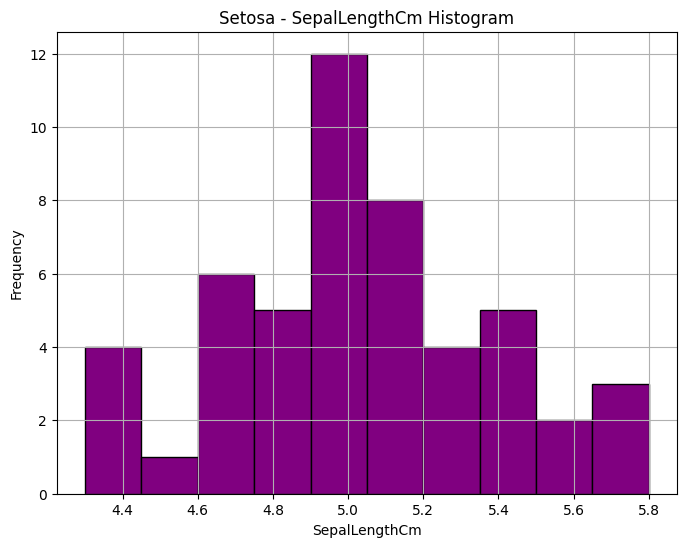

In [30]:
# Generate histogram for  Sepal Length for Setosa as an example
generate_histogram(setosa_data, 'SepalLengthCm', 'Setosa')


Histogram saved at: C:\AlecProjects\pands-project\Created Materials\iris_histograms.png


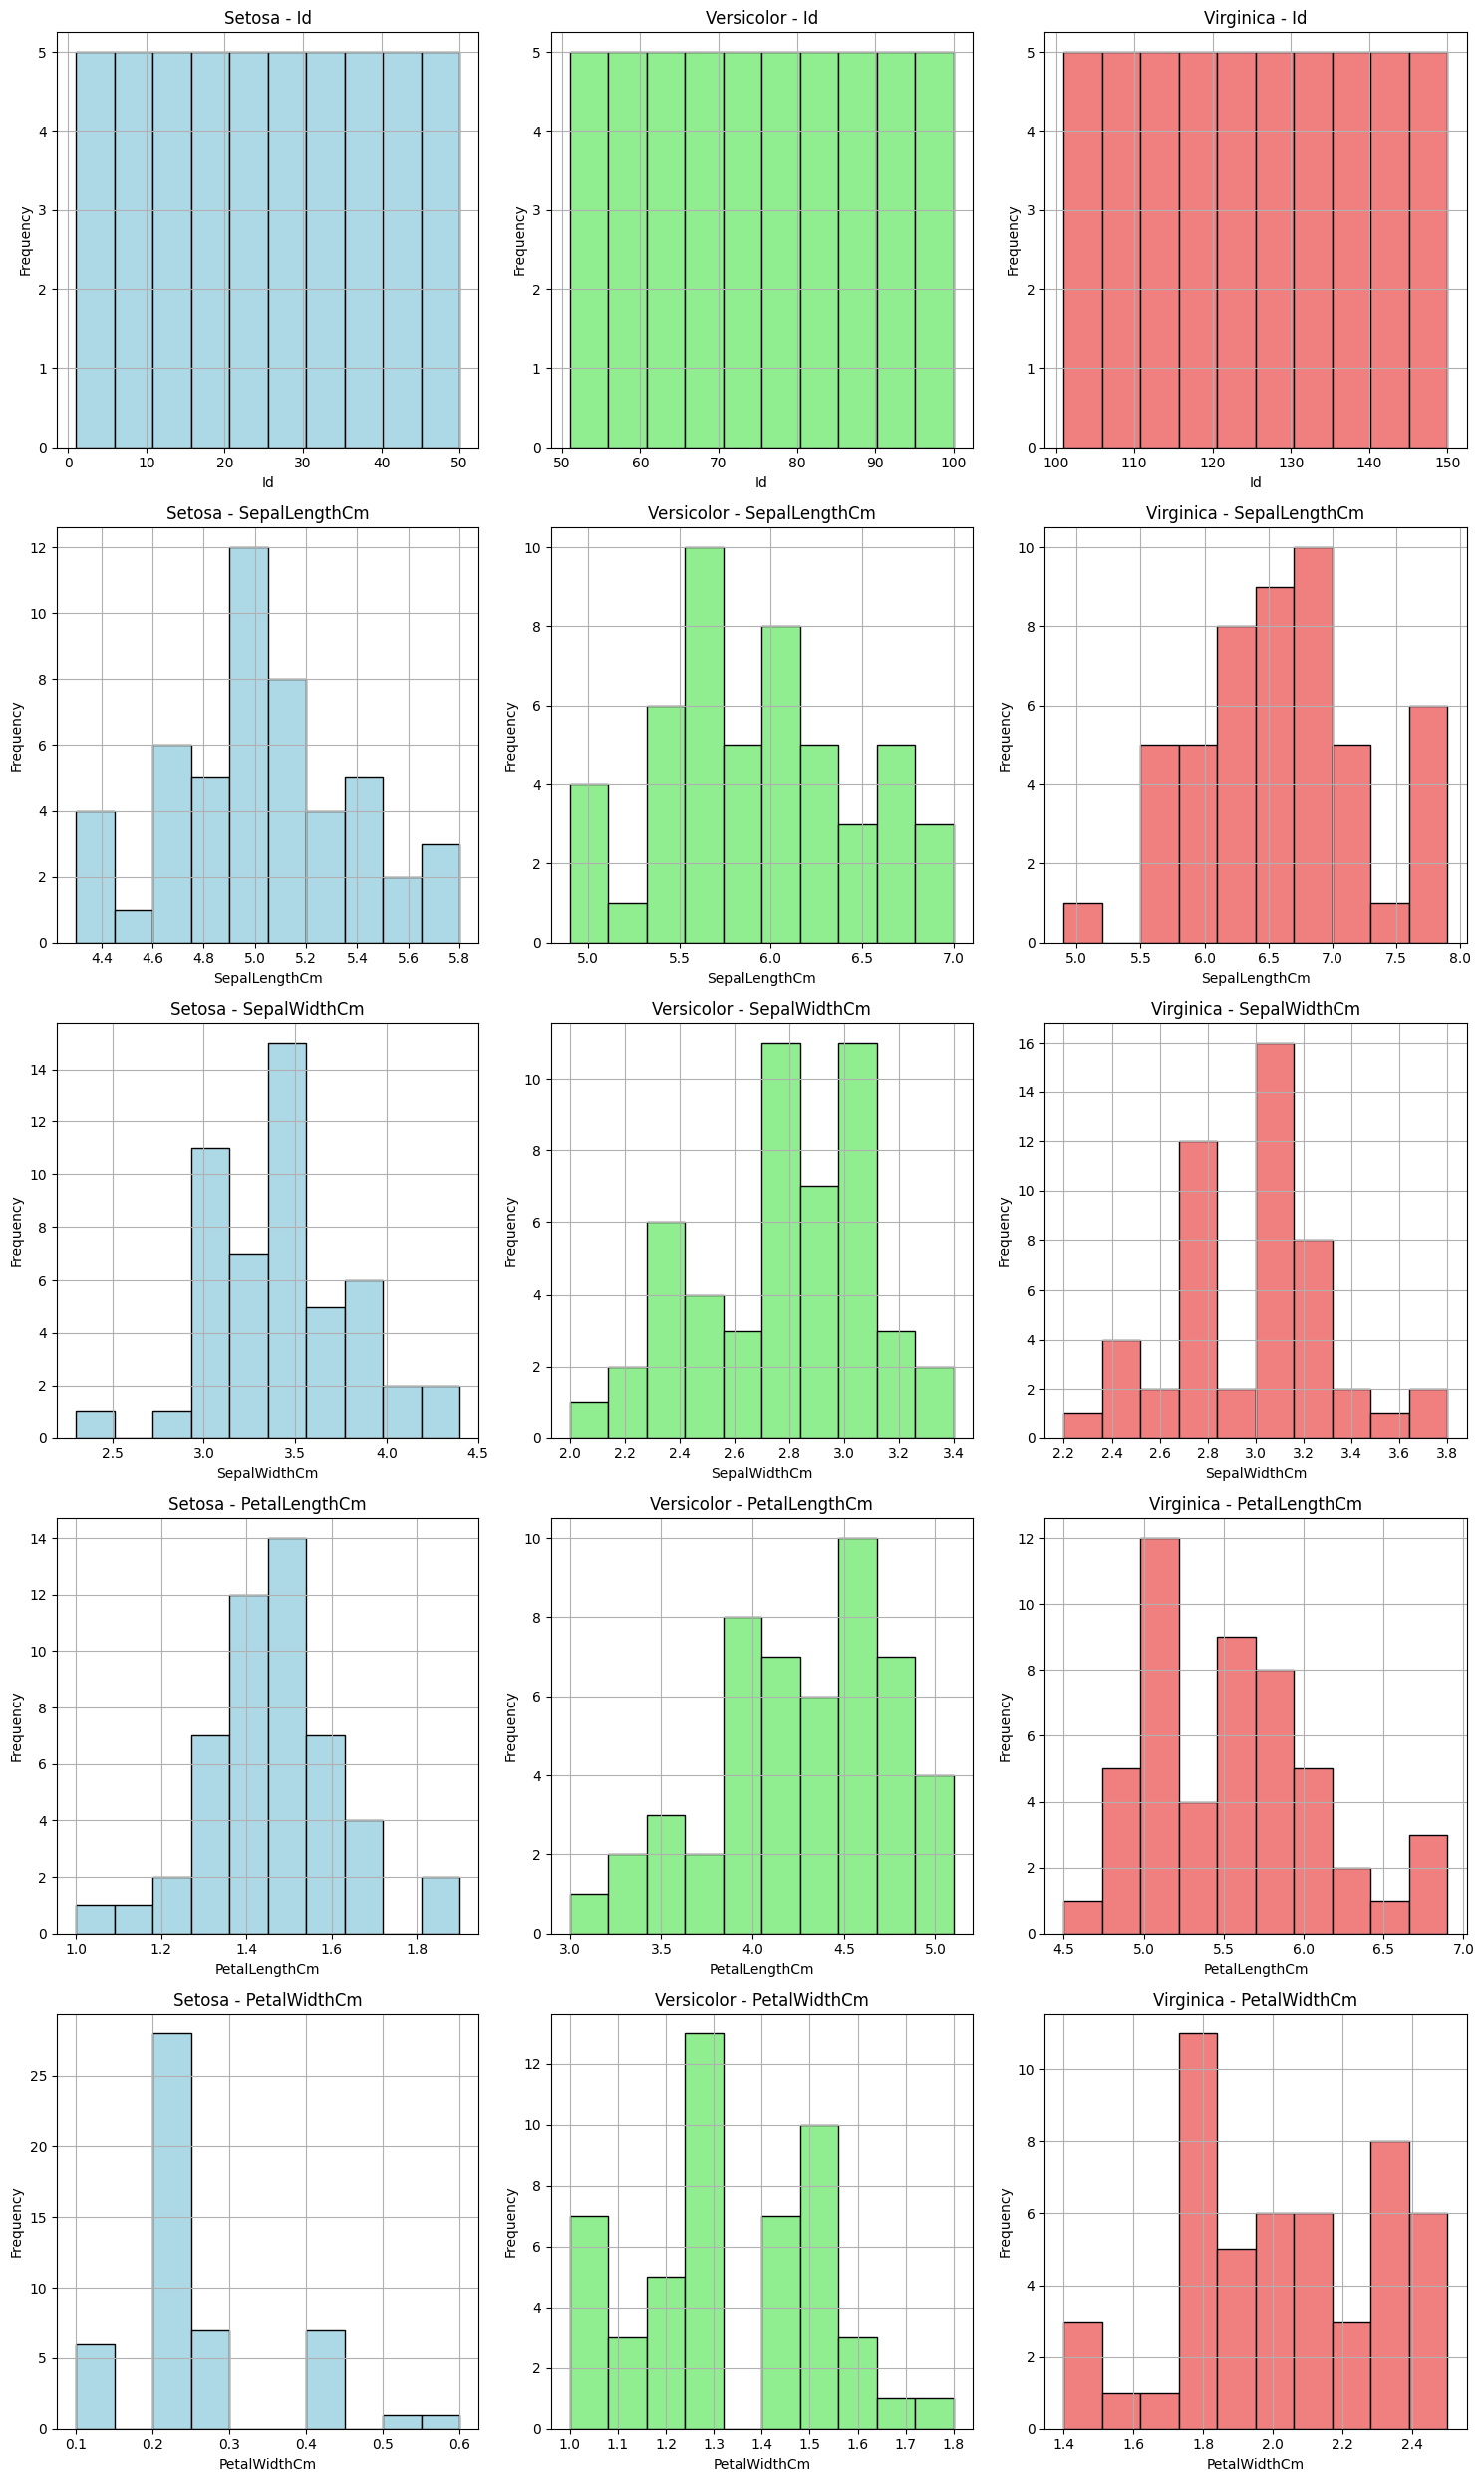

In [31]:
# Define a color palette for the species
species_colors = {'setosa': 'lightblue','versicolor': 'lightgreen','virginica': 'lightcoral'}

# Function to generate histograms for all features for all species with unique colors
def generate_all_histograms(data, save_path):
     # Drop 'id' column 
    if 'id' in data.columns: data = data.drop(columns=['id']) # (COME BACK TO THIS AS IT DOESN'T DROP THE ID COLUMN) (If capital I for Id it creates traceback error)
    species_list = ['setosa', 'versicolor', 'virginica']
    species_data = [setosa_data, versicolor_data, virginica_data]
    
    # Create a figure with subplots for each feature
    num_features = len(data.columns) - 1  # Excluding the 'species' column
    num_species = len(species_list)
    
    # Set up the figure size based on number of features and species
    plt.figure(figsize=(15, num_features * 5)) 
    
    # Loop through each feature and create histograms for each species
    for i, feature_name in enumerate(data.columns[:-1]):  # Skip the 'species' column
        for j, (species, species_df) in enumerate(zip(species_list, species_data)):
            plt.subplot(num_features, num_species, i * num_species + j + 1)  # Create grid of subplots
            # Use unique color for each species
            plt.hist(species_df[feature_name], bins=10, color=species_colors[species], edgecolor='black')
            plt.title(f'{species.capitalize()} - {feature_name}')
            plt.xlabel(feature_name)
            plt.ylabel('Frequency')
            plt.grid(True)
    
    # Adjust layout for better spacing
    plt.tight_layout()
    
    # Save the figure as a PNG file
    plt.savefig(save_path, format='png')
    print(f"Histogram saved at: {save_path}")
    
    # Show the plot (optional, you can comment this out if you don't want it to pop up)
    plt.show()

# Specify the file path to save the PNG file
save_path = r'C:\AlecProjects\pands-project\Created Materials\iris_histograms.png'

# Generate histograms for all features for all species and save the result as a PNG
generate_all_histograms(df, save_path)

### (3.3) Pairplots (Scatter Plot)

A pairplot is a type of data visualization that displays relationships between multiple numerical variables in a dataset. It is useful for exploring the relationships between variables, detecting trends, outliers, or patterns, and comparing distributions. Pairplots are often used in exploratory data analysis (EDA) to get an overview of how different features (variables) in a dataset are related to each other.

Pairplot saved at: C:\AlecProjects\pands-project\Created Materials\iris_pairplot.png


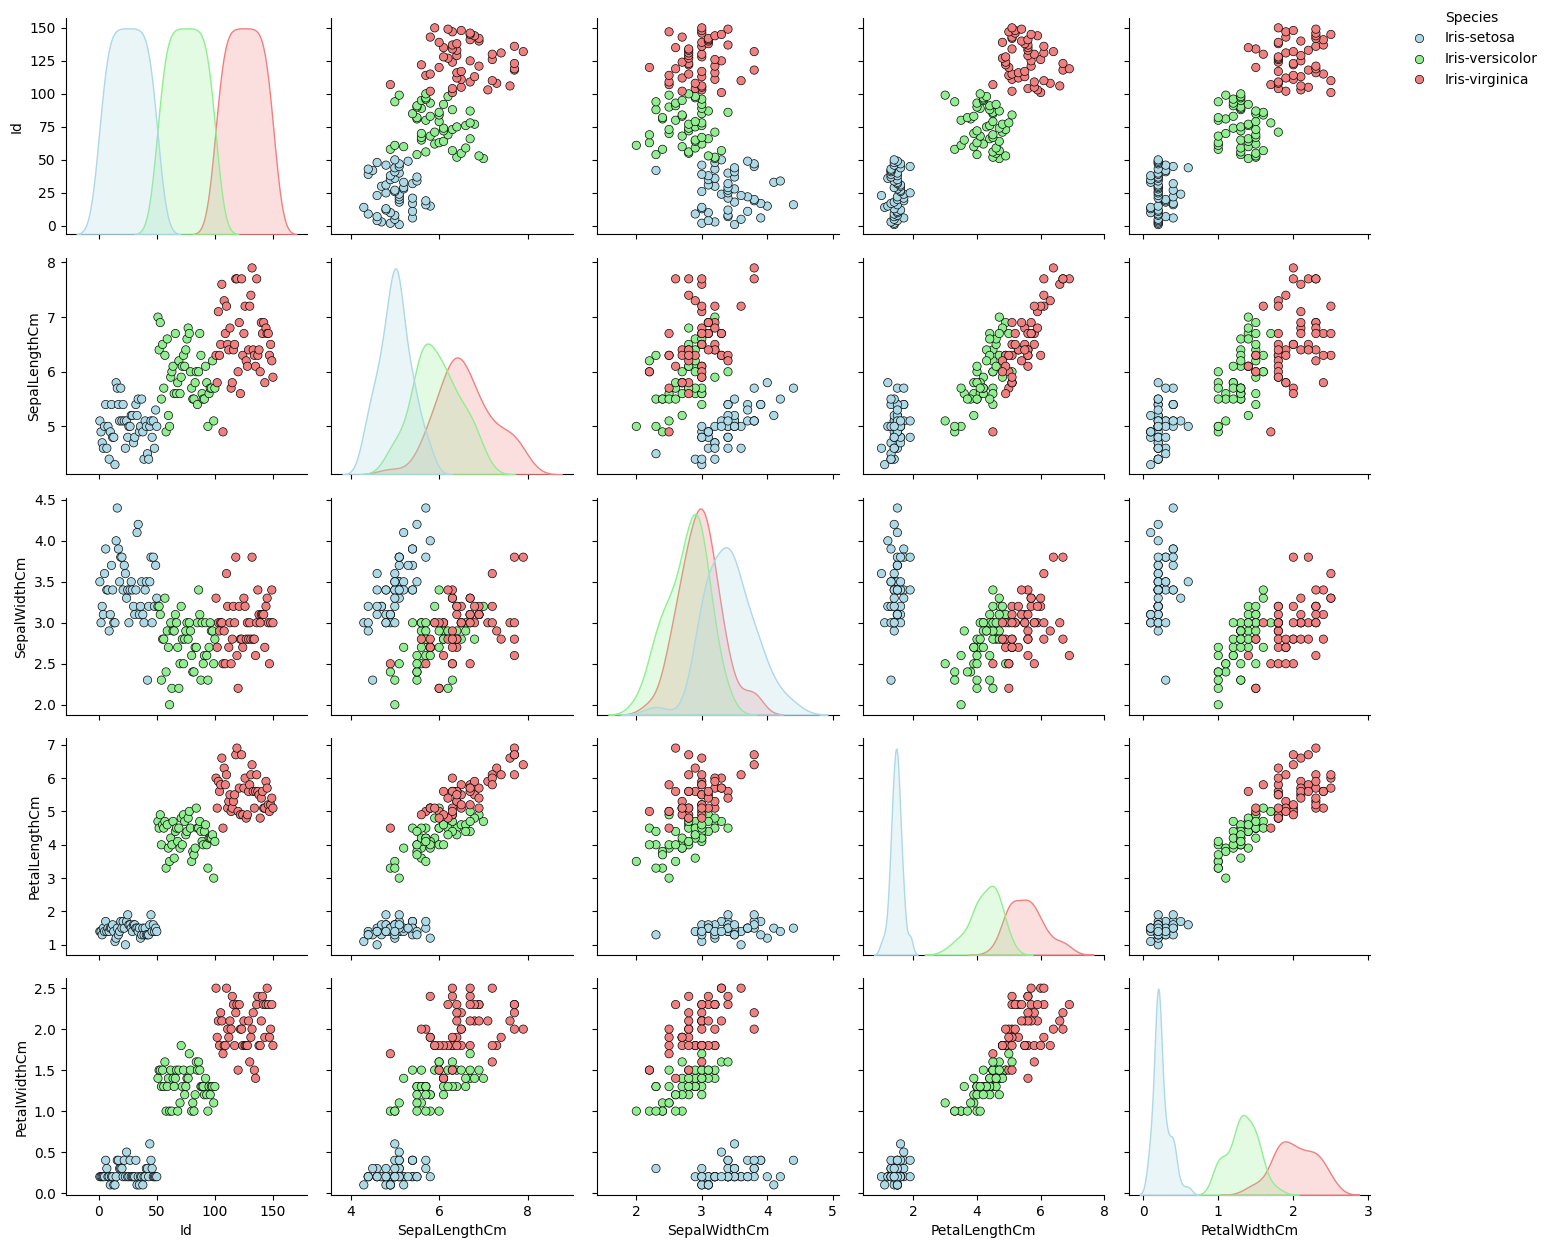

In [32]:
# Define a color palette for the species (must match actual values in the 'Species' column)
species_colors = {'Iris-setosa': 'lightblue','Iris-versicolor': 'lightgreen','Iris-virginica': 'lightcoral'}

# Function to generate a pairplot with species-specific colors
def generate_pairplot(data, save_path):

    # Drop 'id' column if present (COME BACK TO THIS AS ID COLUMN IS STILL SHOWING)
    if 'id' in data.columns:
        data = data.drop(columns=['id'])

    # Generate the pairplot
    pairplot = sns.pairplot(data, hue='Species', palette=species_colors, plot_kws={'edgecolor': 'black'})

    # Move legend outside the plot
    pairplot._legend.set_bbox_to_anchor((1, 1)) # Moves legend to top right
    pairplot._legend.set_loc('upper left')

    # Tighten layout
    plt.tight_layout()

    # Save to file
    plt.savefig(save_path, format='png', bbox_inches='tight')
    print(f"Pairplot saved at: {save_path}")
    plt.show()


# File path to save the image
save_path = r'C:\AlecProjects\pands-project\Created Materials\iris_pairplot.png'

# Generate and save the pairplot
generate_pairplot(df, save_path)


### (3.4) Correlation Heatmap

A correlation heatmap is a data visualization tool that displays the pairwise correlation coefficients between variables in a dataset using a coloured grid (heatmap).

Purpose:
To help you quickly see how strongly (and in what direction) variables are related to each other.

Key Features:
- **Matrix Format:** Rows and columns represent the same variables.

- **Color Scale:** Indicates the strength and direction of correlation.

- **Positive correlation (closer to +1):** Variables increase together (e.g., height and weight).

- **Negative correlation (closer to -1):** One variable increases as the other decreases.

- **Zero correlation (around 0):** No linear relationship.

- **Annotation:** Often includes numerical values inside the squares for exact correlation values.

Correlation heatmap saved at: C:\AlecProjects\pands-project\Created Materials\heatmap.png


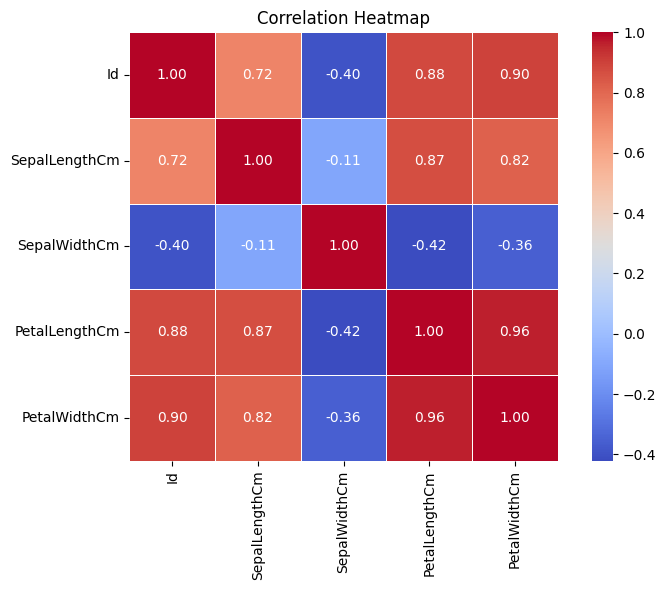

In [33]:
# Function to generate a correlation heatmap
def generate_correlation_heatmap(data, save_path=None):

    # Calculate correlation matrix (excluding non-numeric columns like 'species')
    corr_matrix = data.select_dtypes(include='number').corr()

    # Set up the matplotlib figure
    plt.figure(figsize=(8, 6))

    # Generate a heatmap
    heatmap = sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)

    # Set plot title
    plt.title('Correlation Heatmap')

    # Tighten layout
    plt.tight_layout()

    # Save the plot if save_path is provided
    if save_path:
        plt.savefig(save_path, format='png', bbox_inches='tight')
        print(f"Correlation heatmap saved at: {save_path}")
    
    # Show the plot
    plt.show()

# Save file
save_path = r'C:\AlecProjects\pands-project\Created Materials\heatmap.png'
generate_correlation_heatmap(df, save_path)

----------------------

## (4.) Addtional Analysis : Bee Restaurant

Bees as a species have acheived truly incredible feats, so lets imagine their next success is learning to code and performing some data anyalsis on the Iris dataset on their tiny bee computers. Here are some analysis they might want to perform to help them run an Iris restaurant. 

- Hungry Bee and Lite Bite Bee (Calculating the Mean)
- Fuzzy Bee (Calculating the Standard Deivation)
- Dreamer Bee (Can our Bee Resturantur's Dream Flower ever be?)

### (4.1) Hungry Bee and Lite Bite Bee (Calculating the Mean)

Lets assume that bees believe that flowers with larger sepals produce more pollen and flowers with smaller proportions produce less pollen. We have a bee friend starting a Iris resturant ane we want to help him design his menu based on how hungry his patrons are. 



In [34]:
# Load the dataset
df = pd.read_csv("IrisDataset.csv")

# Drop the 'Id' column if it exists
df = df.drop(columns=['Id'], errors='ignore')

# Group by species and calculate the mean of SepalLengthCm and SepalWidthCm
sepal_means = df.groupby('Species')[['SepalLengthCm', 'SepalWidthCm']].mean()

# Find species with the largest and smallest Sepal Length and Width
largest_sepal_length_species = sepal_means['SepalLengthCm'].idxmax()
smallest_sepal_length_species = sepal_means['SepalLengthCm'].idxmin()
largest_sepal_width_species = sepal_means['SepalWidthCm'].idxmax()
smallest_sepal_width_species = sepal_means['SepalWidthCm'].idxmin()

# Print results
print("Heavy Meal:", largest_sepal_length_species)
print("Lite bite:", smallest_sepal_length_species)
print("Heavy Meal:", largest_sepal_width_species)
print("Lite Bite:", smallest_sepal_width_species)


Heavy Meal: Iris-virginica
Lite bite: Iris-setosa
Heavy Meal: Iris-setosa
Lite Bite: Iris-versicolor


Our Bee friend should recommend an Iris-virginica as his humgdinger of a meal, an iris-setosa or iris-versicolor as his lite bites.

#### (4.2) Fuzzy Bee (Calculating the Standard Deviation)

Our bee restuarateur gets lots of buzzy patrons :) but he gets some fussy ones two who always want their petals to look the same size as they had it last time. We want to help him in recommending which of his irises are the most consistent.

In [35]:
# Load the dataset
df = pd.read_csv("IrisDataset.csv")

# Drop the 'Id' column if it exists
df = df.drop(columns=['Id'], errors='ignore')

# Group by species and calculate the std of SepalLengthCm and SepalWidthCm
petal_std = df.groupby('Species')[['PetalLengthCm', 'PetalWidthCm']].std()

# Find species with the largest and smallest variance in Sepal Length and Width
largest_petal_length_variance = petal_std['PetalLengthCm'].idxmax()
smallest_petal_length_varience = petal_std['PetalLengthCm'].idxmin()
largest_petal_width_varience = petal_std['PetalWidthCm'].idxmax()
smallest_petal_width_varience = petal_std['PetalWidthCm'].idxmin()

# Print results
print("Anybody's guess what you'll get:", largest_petal_length_variance)
print("Safe Bet:", smallest_petal_length_varience)
print("Anybody's guess what you'll get:", largest_petal_width_varience)
print("Safe Bet:", smallest_petal_width_varience)

Anybody's guess what you'll get: Iris-virginica
Safe Bet: Iris-setosa
Anybody's guess what you'll get: Iris-virginica
Safe Bet: Iris-setosa


Our bee friend should play it safe and recommend the iris-setosa to his fussy patrons. Never chance an Iris-virginica!

### (4.3) Dream Flower 

Let's imagine our Bee restraunture has a dream flower of perfect dimensions and he wants to know will this flower ever grown. Lets give him an answer based on how his flower measures against the known length of flower attributes. 

For this we are going to consider a standard deviation in any variable of greater than 1 as a significant difference. 

That Flower is never going to happen pal


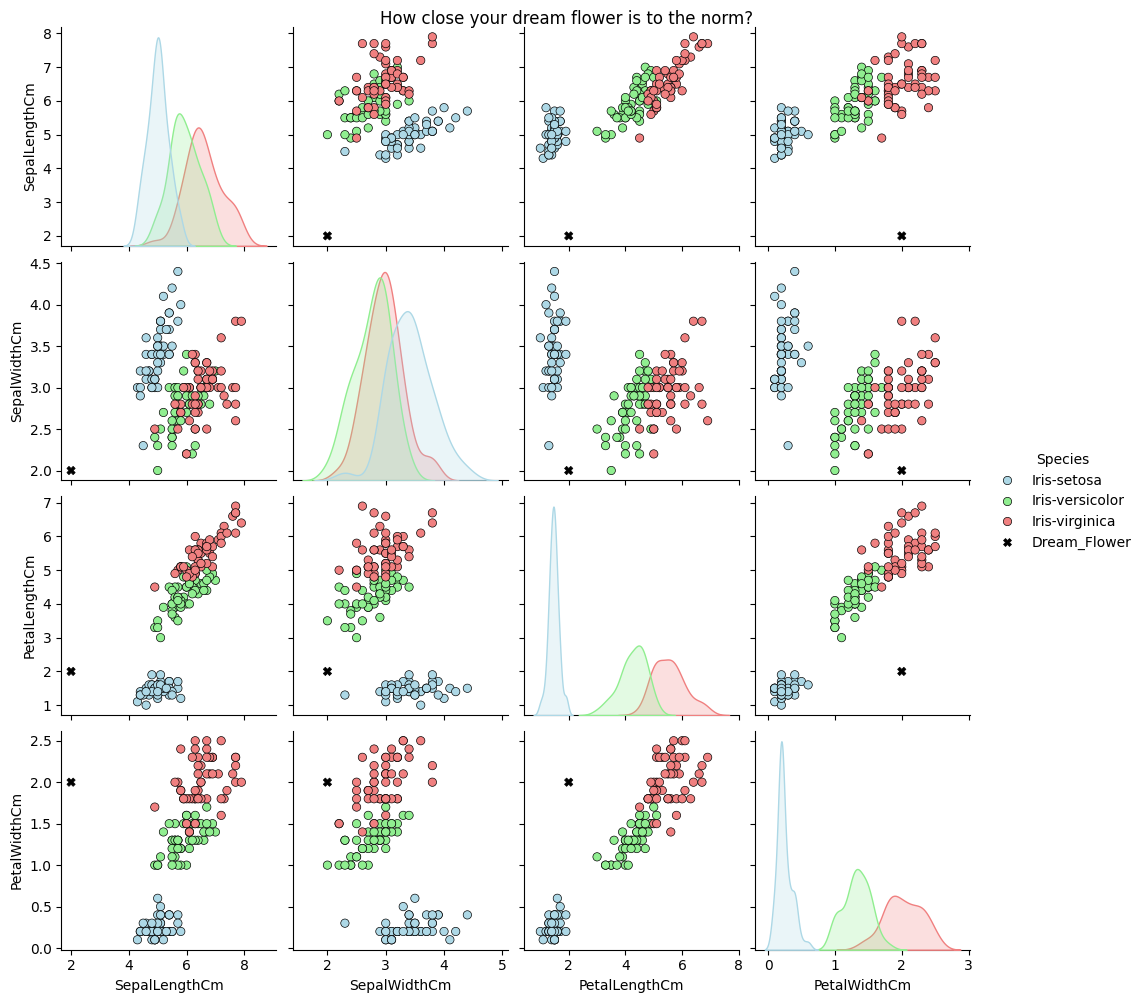

In [42]:
# Load the dataset
df = pd.read_csv("IrisDataset.csv")
df = df.drop(columns=['Id'], errors='ignore')  # Drop 'Id' column if present

# Ask the user for input
sepal_width = float(input("Enter Sepal Width (cm): "))
sepal_length = float(input("Enter Sepal Length (cm): "))
petal_width = float(input("Enter Petal Width (cm): "))
petal_length = float(input("Enter Petal Length (cm): "))

# Create a DataFrame for the user's input
Dream_Flower = pd.Series({'SepalLengthCm': sepal_length,'SepalWidthCm': sepal_width,'PetalLengthCm': petal_length,'PetalWidthCm': petal_width})

# Compute mean values per species
species_means = df.groupby('Species')[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].mean()

# Calculate standard deviation of difference between user's input and each species mean
std_devs = species_means.apply(lambda row: np.std(Dream_Flower.values - row.values), axis=1)

# Find the smallest std deviation to the closest matching species
min_std = std_devs.min()

# Print outcome message
if min_std > 1:
    print("That Flower is never going to happen pal")
else:
    print("That Flower could happen")

# Append user input to original dataset for visualization
user_row = Dream_Flower.to_dict()
user_row['Species'] = 'Dream_Flower'  # Assign a new species name for the user input
df = pd.concat([df, pd.DataFrame([user_row])], ignore_index=True)

# Plot using pairplot
palette = {'Iris-setosa': 'lightblue','Iris-versicolor': 'lightgreen','Iris-virginica': 'lightcoral','Dream_Flower': 'black'}

sns.pairplot(df, hue='Species', palette=palette, plot_kws={'edgecolor': 'black'}, markers=["o", "o", "o", "X"])
plt.suptitle("How close your dream flower is to the norm?",y = 1) # adjust value for y to move title label up
plt.show()


------------------

## (5.) Conclusions & Future Work 

The analysis of the Iris dataset showed the relationships between different flower species and their physical features. The dataset contains four key measurements for each flower: Sepal Length, Sepal Width, Petal Length, and Petal Width, across three species: Iris-setosa, Iris-versicolor, and Iris-virginica.

By visualizing the dataset using pair plots and histograms, we observed clear distinctions in the physical features of the three Iris species. 
- The measurements for Iris-setosa were typically smaller in both Sepal and Petal dimensions compared to Iris-versicolor and Iris-virginica, which tended to have larger, overlapping values.
- Iris-setosa was consistently identified as the smallest species, particularly in terms of both Sepal Width and Sepal Length.
- Iris-virginica, on the other hand, was found to have the largest Sepal and Petal sizes on average, making it the largest species in the dataset.

**Future Work**
- Figure out how to drop the ID column for plotting
- Would be good to add AI analysis on the heatmap,pairplot and histograms produced so that the AI can add a description of what is to be observed. 
- Help a bee run a resturant. 

-------------

# (6.) References and Biobliogrpahy



**Dataset Sources:**
- Dua, D., & Graff, C. (2017). Iris Data Set. UCI Machine Learning Repository. Retrieved from https://www.kaggle.com/datasets/uciml/iris
- Fisher, R. A. (1936). The use of multiple measurements in taxonomic problems. Annals of Eugenics, 7(2), 179–188. DOI: 10.1111/j.1469-1809.1936.tb02137.x

**Websites:**
- Spark By {Examples}. (n.d.). Split Pandas DataFrame by Column Value. Spark By {Examples}. Retrieved May 12, 2025, from https://sparkbyexamples.com/pandas/split-pandas-dataframe-by-column-value/#:~:text=Split%20DataFrame%20by%20Unique%20Column,utilizing%20the%20get_group()%20function
- Edlitera. (n.d.). Pandas: Add, Rename, and Remove Columns. Edlitera. Retrieved May 12, 2025, from https://www.edlitera.com/blog/posts/pandas-add-rename-remove-columns#:~:text=To%20remove%20a%20column%20from,want%20to%20modify%20our%20DataFram
- Waskom, M. (2021). Seaborn: Statistical data visualization. Journal of Open Source Software, 6(60), 3021. https://doi.org/10.21105/joss.03021
- Matplotlib Development Team. (n.d.). Matplotlib: Visualization with Python. https://matplotlib.org/
- Waskom, M., & Seaborn Contributors. (n.d.). seaborn.pairplot. Seaborn Documentation. Retrieved May 12, 2025, from https://seaborn.pydata.org/generated/seaborn.pairplot.html
- Waskom, M., & Seaborn Contributors. (n.d.). seaborn.heatmap. Seaborn Documentation. Retrieved May 12, 2025, from https://seaborn.pydata.org/generated/seaborn.heatmap.html
- Matplotlib Development Team. (n.d.). matplotlib.pyplot.hist. Matplotlib Documentation. Retrieved May 12, 2025, from https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html
- pandas contributors. (n.d.). pandas.DataFrame.drop. pandas Documentation. Retrieved May 12, 2025, from https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html

**Youtube:**
- Data Talks. (2020, November 23). Pairplot - Seaborn [Video]. YouTube. https://www.youtube.com/watch?v=cpZExlOKFH4

**Respositries:**
- Reid, A. (2025). Applied_Statistics_AR: Alec Reid course work for applied statistics module [GitHub repository]. GitHub. https://github.com/PectenMaximus/Applied_Statistics_AR

**Where AI was used in this Project:**
- Table of Content Headings - OpenAI. (2025). ChatGPT (May 3 version) [Large language model]. https://chat.openai.com/
- Iris Data Set Description - OpenAI. (2025). ChatGPT (May 3 version) [Large language model]. https://chat.openai.com/
- Introduction OpenAI. (2025). ChatGPT (May 3 version) [Large language model]. https://chat.openai.com/
- Conclusion - Iris Data Set Description - OpenAI. (2025). ChatGPT (May 3 version) [Large language model]. https://chat.openai.com/
- Corrolation Heatmap explanation and fixing code - OpenAI. (2025). ChatGPT (May 3 version) [Large language model]. https://chat.openai.com/
- Code to fix broken df.drop - OpenAI. (2025). ChatGPT (May 3 version) [Large language model]. https://chat.openai.com/
-----------